StemMin: 3, StemMax: 7, StemPeers: 2, ReductionMin: 1.25, ReductionMax: 2
NUMBER RUNS: 10000
HOPS:
  - Mean: 3.0289
  - Median: 3.0
  - StdD: 0.872390273902684
  - Min: 2
  - Max: 6


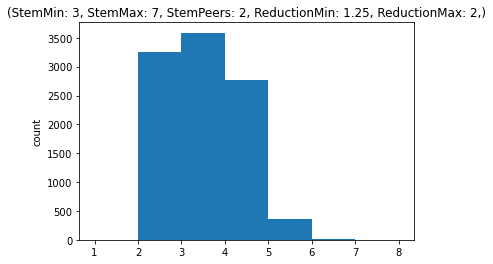

In [34]:
from dandelion_utils.generateStemLength import generateStemLength
from dandelion_utils.reviseStemLength import reviseStemLength

from dataclasses import dataclass
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

@dataclass
class Params:
    stemMin: int
    stemMax: int
    numberOfStemPeers: int
    StemReductionMin: float
    StemReductionMax: float

    def __repr__(self):
        return self.long_description()
        
    def long_description(self):
        return f'StemMin: {self.stemMin}, StemMax: {self.stemMax}, StemPeers: {self.numberOfStemPeers}, ReductionMin: {self.StemReductionMin}, ReductionMax: {self.StemReductionMax}'
    
    def short_description(self):
        return f'{self.stemMin}-{self.stemMax}, {self.numberOfStemPeers}p, {self.StemReductionMin}-{self.StemReductionMax}r'

class Sweep:
    def __init__(self, params: Params, num_runs: int, hops: []):
        self.params = params,
        self.num_runs = num_runs
        self.hops = hops
        
    def describe_sweep(self):
        print(f"NUMBER RUNS: {self.num_runs}")
        print(f"HOPS:")
        print(f"  - Mean: {np.mean(self.hops)}")
        print(f"  - Median: {np.median(self.hops)}")
        print(f"  - StdD: {np.std(self.hops)}")
        print(f"  - Min: {np.amin(self.hops)}")
        print(f"  - Max: {np.amax(self.hops)}")
        
    def plot_sweep(self):
        _title = self.params
        plt.hist(self.hops, bins=[1,2,3,4,5,6,7,8])
        plt.gca().set(title=_title, ylabel='count');

def printConstants(params: Params):
    print("USING CONSTANTS:")
    print(f"  - StemMin: {params.stemMin}")
    print(f"  - StemMax: {params.stemMax}")
    print(f"  - numberOfStemPeers: {params.numberOfStemPeers}")
    print(f"  - StemReductionMin: {params.StemReductionMin}")
    print(f"  - StemReductionMax: {params.StemReductionMax}")


def random_stem_hops(params: Params):
    # Generate a random initial stem length
    stemLength = generateStemLength(params.stemMin, params.stemMax)
    hops = 0
    while stemLength > 0:
        hops += 1
        temp_stems = []
        # This simulates the message being passed to multiple "stem peers", 
        # of the multiple paths that the message takes, we are always going 
        # to chose the shortest path.
        for x in range(params.numberOfStemPeers):
            temp_stems.append(reviseStemLength(stemLength, params.StemReductionMin, params.StemReductionMax))
        stemLength = min(temp_stems)
    return hops

def single_sweep(params: Params, num_runs=10000):
    hops = []
    while len(hops) < num_runs:
        hops.append(random_stem_hops(params))
    return Sweep(params, num_runs, hops)
    
def generate_data():
    params = Params(stemMin = 3, stemMax = 7, numberOfStemPeers = 2, StemReductionMin = 1.25, StemReductionMax = 2)
    x = single_sweep(params)
    print(params)
    x.describe_sweep()
    x.plot_sweep()


if __name__ == "__main__":
    
    generate_data()
